In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

from xgboost import XGBRegressor
from xgboost import plot_importance 

from sklearn.externals import joblib

In [10]:
# printing floating point numbers upto precision 2
np.set_printoptions(precision=2, suppress=True) 

In [11]:
df = pd.read_csv("BlackFriday 2.csv")

In [12]:
df.shape

(537577, 12)

In [13]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [14]:
pd.set_option('display.max_columns', 20)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Some feaures are numeric and some are categorical
# Filtering the categorical features:

In [15]:
df.dtypes[df.dtypes=='object']

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

# Distributions of numeric features

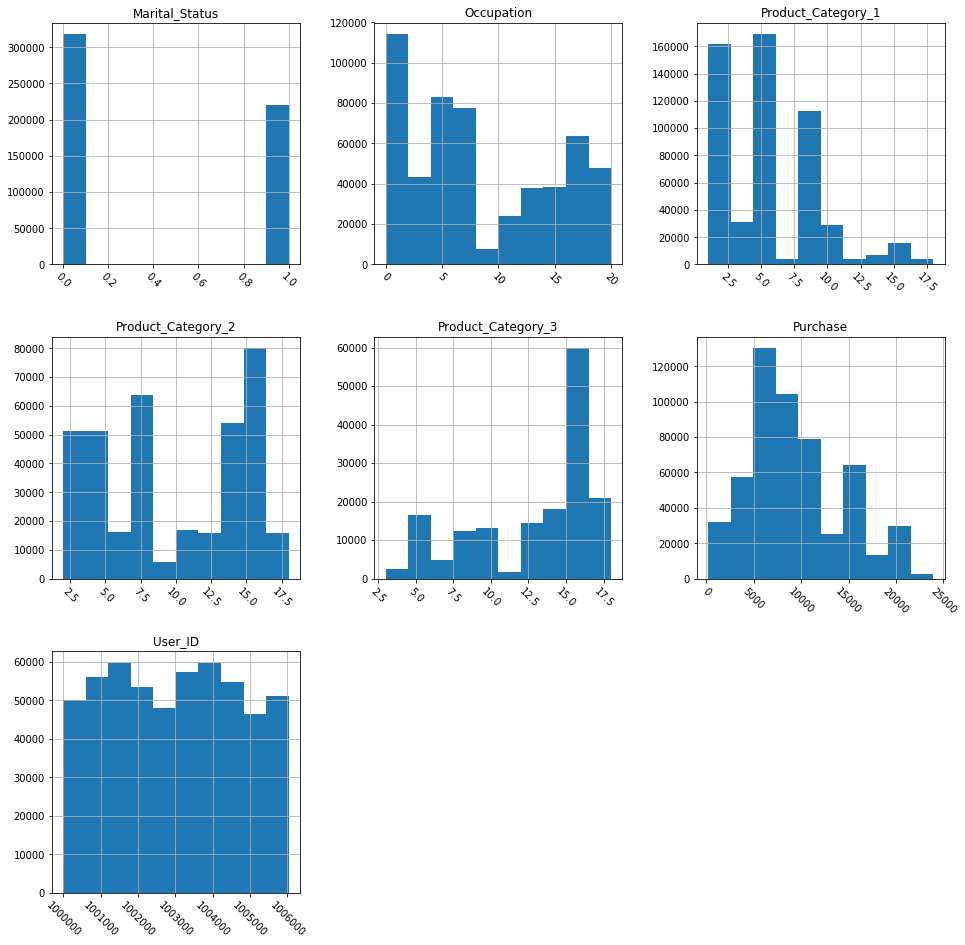

In [16]:
df.hist(figsize=(16,16), xrot=-45)
plt.show()

# Display summary statistics for the numerical features.

In [17]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


# Observation:

The max of all three product categories are 18. The peoduct category 2 has the highest std.

In [18]:
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


# Observation:

The most frequent element for city category is B, it counts 226493 times.

# Segmentations:

observe the relationship between categorical features and numeric features.

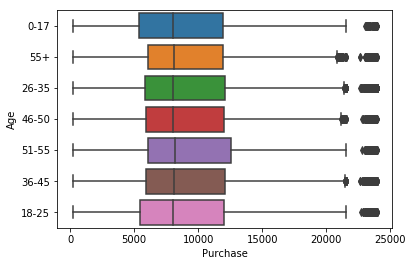

In [19]:
sns.boxplot(y='Age', x='Purchase', data=df)

# Observation:

51-55 age range has the highest purchase ability, but all of them the purchase range is around 5000-1300

In [20]:
df.groupby('Age').mean()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,,
0-17,1.002676e+06,8.790236,0.000000,4.936357,9.023027,11.850282,9020.126878
18-25,1.002766e+06,6.737141,0.211412,5.003359,9.474317,12.395286,9235.197575
26-35,1.003075e+06,7.902343,0.392035,5.217085,9.810403,12.648689,9314.588970
36-45,1.003030e+06,8.847152,0.395418,5.387613,9.954321,12.750717,9401.478758
46-50,1.003152e+06,8.526367,0.723038,5.629587,10.177195,12.937952,9284.872277
51-55,1.002950e+06,8.809506,0.717183,5.649662,10.280446,13.108187,9620.616620
55+,1.002951e+06,9.537961,0.634981,5.896570,10.462992,13.154686,9453.898579


In [21]:
df.groupby('Age').agg([np.mean, np.std])

User_ID              Occupation           Marital_Status  \
               mean          std       mean       std           mean   
Age                                                                    
0-17   1.002676e+06  1755.525095   8.790236  4.491994       0.000000   
18-25  1.002766e+06  1716.270135   6.737141  5.949072       0.211412   
26-35  1.003075e+06  1719.986312   7.902343  6.698011       0.392035   
36-45  1.003030e+06  1677.032766   8.847152  6.588780       0.395418   
46-50  1.003152e+06  1768.300690   8.526367  6.682162       0.723038   
51-55  1.002950e+06  1667.161146   8.809506  6.664605       0.717183   
55+    1.002951e+06  1644.942652   9.537961  6.358962       0.634981   

                Product_Category_1           Product_Category_2            \
            std               mean       std               mean       std   
Age                                                                         
0-17   0.000000           4.936357  3.526901           9.023027  5.176184   
18-25  0.408312           5.003359  3.610570           9.474317  5.140842   
26-35  0.488206           5.217085  3.718937           9.810403  5.075915   
36-45  0.488942           5.387613  3.809601           9.954321  5.082563   
46-50  0.447502           5.629587  3.861818          10.177195  5.016661   
51-55  0.450374           5.649662  3.918494          10.280446  5.028167   
55+    0.481447           5.896570  3.826757          10.462992  4.941885   

      Product_Category_3               Purchase               
                    mean       std         mean          std  
Age                                                           
0-17           11.850282  4.383450  9020.126878  5060.498917  
18-25          12.395286  4.243974  9235.197575  4995.723417  
26-35          12.648689  4.123401  9314.588970  4974.081415  
36-45          12.750717  4.078818  9401.478758  4978.252054  
46-50          12.937952  3.993584  9284.872277  4921.253566  
51-55          13.108187  3.941584  9620.616620  5035.326515  
55+            13.154686  3.938299  9453.898579  4939.124514

In [22]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


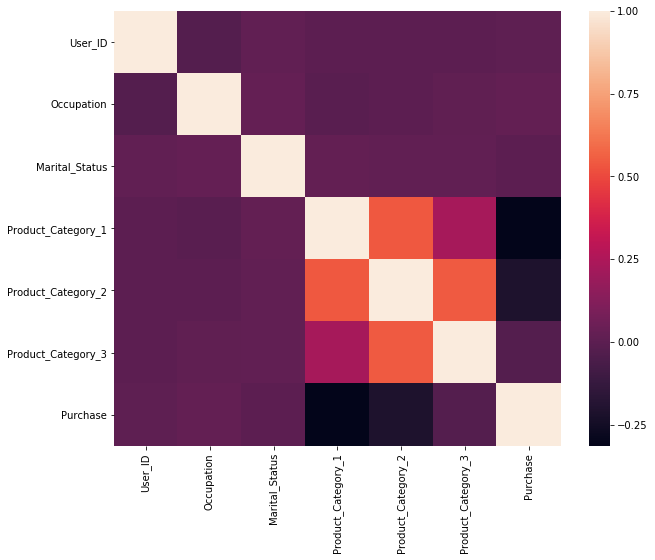

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

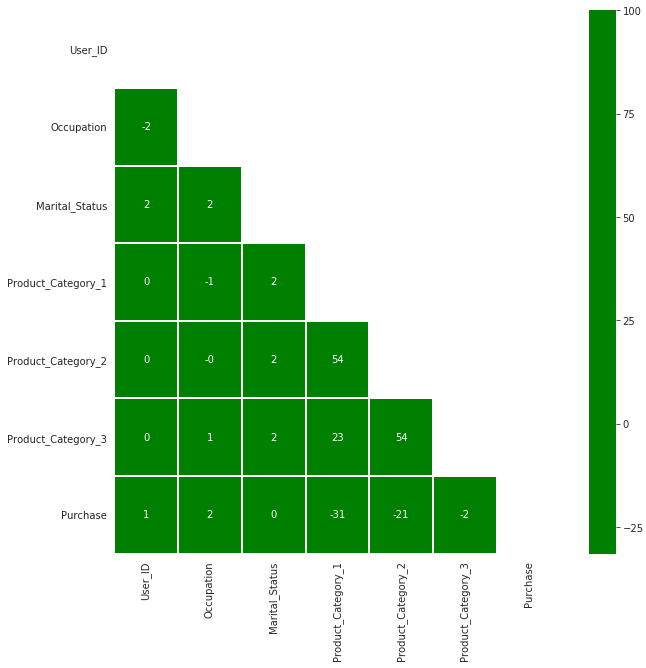

In [24]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
 ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green']))

# Data Cleaning

In [25]:
#drop any duplicates 
df = df.drop_duplicates()
print( df.shape )

(537577, 12)


we didn't have any duplicates in our original dataset.

# Fix structural errors

The Product_Category_2 and Product_Category_3 feature have some nan values, to handle them:

In [26]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

Fill missing 'Product_Category_2' values with the value 5 to turn 'Product_Category_2' into a true indicator variable

In [27]:
df.Product_Category_2.fillna(5, inplace=True)

In [28]:
df.Product_Category_2.unique()

array([ 5.,  6., 14.,  2.,  8., 15., 16., 11.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

Fill missing 'Product_Category_3' values with the value 4 to turn 'Product_Category_3' into a true indicator variable

In [29]:
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [30]:
df.Product_Category_3.fillna(4, inplace=True)

In [31]:
df.Product_Category_3.unique()

array([ 4., 14., 17.,  5., 16., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

# Types and capitalization

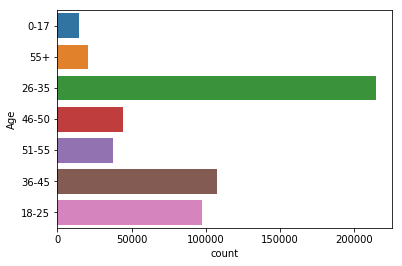

In [32]:
# Class distributions for 'Age'
sns.countplot(y='Age', data=df)

# Removing Outliers

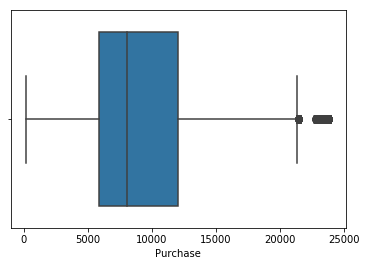

In [33]:
sns.boxplot(df.Purchase)

# Interpretation

In [34]:
df.Purchase.sort_values(ascending=False).head()

87440     23961
93016     23961
370891    23961
503697    23960
321782    23960
Name: Purchase, dtype: int64

In [35]:
## Remove observations with Purchase greater than 5000.
df = df[df.Purchase <= 5000]
df.shape

(89432, 12)

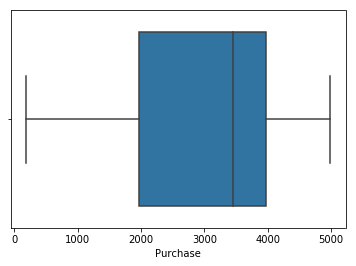

In [36]:
## Plotting the boxplot of purchase after the change
sns.boxplot(df.Purchase)

# Label missing categorical data

Display number of missing values by categorical feature

In [37]:
df.select_dtypes(include=['object']).isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

Display number of missing values by numeric feature

In [38]:
df.select_dtypes(exclude=['object']).isnull().sum()

User_ID               0
Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
dtype: int64

we don't have any categorical feature and numerical features with missing values in this dataset.

# Encode dummy variables (One Hot Encoding)

Create dummy variables for our categorical features

In [39]:
df = pd.get_dummies(df, columns=['Product_ID', 'Gender', 'Age','City_Category','Stay_In_Current_City_Years'])

In [40]:
df.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_ID_P00000142,Product_ID_P00000242,Product_ID_P00000342,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
2,1000001,10,0,12,5.0,4.0,1422,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1000001,10,0,12,14.0,4.0,1057,0,0,0,...,0,0,1,0,0,0,0,1,0,0
11,1000005,20,1,8,5.0,4.0,3957,0,0,0,...,0,0,1,0,0,0,1,0,0,0
15,1000006,9,0,4,5.0,4.0,2079,0,0,0,...,1,0,1,0,0,0,1,0,0,0
60,1000015,7,0,5,8.0,4.0,3594,0,0,0,...,0,0,1,0,0,0,1,0,0,0


# Save the file which we have cleaned data

In [41]:
df.to_csv(r'|c:\Users\Linlin Zhu\Desktop\BlackFriday 10.csv', index = None)

In [43]:
df = pd.read_csv("BlackFriday 10.csv")

In [44]:
df.shape

(89432, 3311)

# Train and Test Splits

y is target variable and x is input features

In [45]:
y = df.Purchase

X = df.drop('Purchase', axis=1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

0.2 is 20% for test
we have 4 files, therefore,1234

In [47]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(71545, 3310) (17887, 3310) (71545,) (17887,)


In [48]:
train_mean = X_train.mean()
train_std = X_train.std()

Standardize the train data set

In [49]:
X_train = (X_train - train_mean) / train_std

Check for mean and std dev.

In [50]:
X_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID_P00000142,Product_ID_P00000242,Product_ID_P00000342,Product_ID_P00000442,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,...,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04,7.154500e+04
mean,2.390887e-14,-1.016477e-15,-5.280686e-16,1.014681e-15,-3.053909e-17,1.077139e-16,-1.296632e-15,-2.102192e-15,2.609924e-15,2.317787e-15,...,9.544155e-16,-2.317470e-15,9.271623e-16,5.032494e-16,-8.497252e-17,-5.013919e-16,3.932342e-16,2.281369e-15,1.627456e-15,-5.186418e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.749794e+00,-1.200852e+00,-8.234512e-01,-1.475518e+00,-1.414088e+00,-7.153625e-01,-1.121646e-02,-1.586347e-02,-2.773676e-02,-2.148149e-02,...,-2.490967e-01,-1.833113e-01,-6.543332e-01,-8.766149e-01,-6.014742e-01,-4.011420e-01,-7.399190e-01,-4.727255e-01,-4.567599e-01,-4.239022e-01
25%,-8.853865e-01,-8.980682e-01,-8.234512e-01,-7.586975e-01,-7.730216e-01,-4.604003e-01,-1.121646e-02,-1.586347e-02,-2.773676e-02,-2.148149e-02,...,-2.490967e-01,-1.833113e-01,-6.543332e-01,-8.766149e-01,-6.014742e-01,-4.011420e-01,-7.399190e-01,-4.727255e-01,-4.567599e-01,-4.239022e-01
50%,2.528707e-02,-2.925001e-01,-8.234512e-01,-5.197573e-01,-7.730216e-01,-4.604003e-01,-1.121646e-02,-1.586347e-02,-2.773676e-02,-2.148149e-02,...,-2.490967e-01,-1.833113e-01,-6.543332e-01,-8.766149e-01,-6.014742e-01,-4.011420e-01,-7.399190e-01,-4.727255e-01,-4.567599e-01,-4.239022e-01
75%,8.258599e-01,9.186361e-01,1.214384e+00,9.138843e-01,1.150176e+00,-4.604003e-01,-1.121646e-02,-1.586347e-02,-2.773676e-02,-2.148149e-02,...,-2.490967e-01,-1.833113e-01,1.528252e+00,1.140736e+00,1.662559e+00,-4.011420e-01,1.351480e+00,-4.727255e-01,-4.567599e-01,-4.239022e-01
max,1.786899e+00,1.826988e+00,1.214384e+00,2.586466e+00,2.004931e+00,3.109071e+00,8.915343e+01,6.303703e+01,3.605274e+01,4.655105e+01,...,4.014449e+00,5.455126e+00,1.528252e+00,1.140736e+00,1.662559e+00,2.492848e+00,1.351480e+00,2.115363e+00,2.189304e+00,2.359002e+00


We use train_mean and train_std_dev to standardize test data set

In [51]:
X_test = (X_test - train_mean) / train_std

Check for mean and std dev. - not exactly 0 and 1

In [52]:
X_test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID_P00000142,Product_ID_P00000242,Product_ID_P00000342,Product_ID_P00000442,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,17887.000000,17887.000000,17887.000000,17887.000000,17887.000000,17887.000000,17887.000000,17887.000000,17887.000000,17887.000000,...,17887.000000,17887.000000,17887.000000,17887.000000,17887.000000,17887.000000,17887.000000,17887.000000,17887.000000,17887.000000
mean,-0.007062,0.005392,-0.004990,-0.008601,0.007796,0.003412,-0.006232,0.001762,0.006555,-0.008463,...,0.009047,0.016226,-0.017629,-0.000065,0.018360,-0.012515,0.001957,0.003163,0.001090,0.004883
std,1.000470,0.997984,0.999033,0.989831,0.999906,1.001694,0.666690,1.054078,1.111818,0.778570,...,1.016872,1.041790,0.992131,1.000012,1.009548,0.986765,1.000617,1.002611,1.000964,1.004723
min,-1.749794,-1.200852,-0.823451,-1.475518,-1.414088,-0.715363,-0.011216,-0.015863,-0.027737,-0.021481,...,-0.249097,-0.183311,-0.654333,-0.876615,-0.601474,-0.401142,-0.739919,-0.472725,-0.456760,-0.423902
25%,-0.889486,-0.898068,-0.823451,-0.758698,-0.773022,-0.460400,-0.011216,-0.015863,-0.027737,-0.021481,...,-0.249097,-0.183311,-0.654333,-0.876615,-0.601474,-0.401142,-0.739919,-0.472725,-0.456760,-0.423902
50%,0.013574,-0.141108,-0.823451,-0.519757,-0.773022,-0.460400,-0.011216,-0.015863,-0.027737,-0.021481,...,-0.249097,-0.183311,-0.654333,-0.876615,-0.601474,-0.401142,-0.739919,-0.472725,-0.456760,-0.423902
75%,0.815318,0.918636,1.214384,0.913884,1.150176,-0.460400,-0.011216,-0.015863,-0.027737,-0.021481,...,-0.249097,-0.183311,1.528252,1.140736,1.662559,-0.401142,1.351480,-0.472725,-0.456760,-0.423902
max,1.786899,1.826988,1.214384,2.586466,2.004931,3.109071,89.153426,63.037026,36.052739,46.551047,...,4.014449,5.455126,1.528252,1.140736,1.662559,2.492848,1.351480,2.115363,2.189304,2.359002


# Model 1 - Baseline Model

In [53]:
# Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [54]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()
from sklearn.metrics import r2_score

In [55]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  1180.3864743063734
R-squared:  0.0
Mean Absolute Error:  1033.336273345214


In [56]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  1171.2037174601737
R-squared:  -0.00022609014110597236
Mean Absolute Error:  1024.6952617534753


# Model-2 Ridge Regression

In [ ]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)